In [146]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

from libka import *

In [147]:
df = pd.read_csv("in/capacity.csv", names = ["Tset", "T", "Cx pF"], header = 0)
A = 20 * 10**(-6) # m^2
d = 0.8 * 10**(-3) # m
e0 = 8.854e-12 # F/m
TK = 273.15 # K
PODZIALKA_CX = 10 # pF

In [148]:
df.insert(2, "TK", df["T"] + TK)
df.insert(3, "uT K", 0.1/np.sqrt(3))

df["uCx pF"] = typeB(PODZIALKA_CX, PODZIALKA_CX/2)
df["Cx F"] = df["Cx pF"] * 10**(-12)
df["uCx F"] = df["uCx pF"] * 10**(-12)

df["eps"] = df["Cx F"] * d / A /  e0 
df["ueps"] = d/A/e0 * df["uCx F"]

df["chi"] = df["eps"] - 1
df["uchi"] = df["ueps"]

df["1/chi"] = 1 / df["chi"]
df["u1/chi"] = df["uchi"] / df["chi"]**2

In [149]:
df

,Tset,T,TK,uT K,Cx pF,uCx pF,Cx F,uCx F,eps,ueps,chi,uchi,1/chi,u1/chi
0,24,26.8,299.95,0.057735,30,6.454972,3.000000e-11,6.454972e-12,135.531963,29.161835,134.531963,29.161835,0.007433,0.001611
1,28,27.6,300.75,0.057735,30,6.454972,3.000000e-11,6.454972e-12,135.531963,29.161835,134.531963,29.161835,0.007433,0.001611
2,32,31.2,304.35,0.057735,34,6.454972,3.400000e-11,6.454972e-12,153.602891,29.161835,152.602891,29.161835,0.006553,0.001252
3,33,32.3,305.45,0.057735,34,6.454972,3.400000e-11,6.454972e-12,153.602891,29.161835,152.602891,29.161835,0.006553,0.001252
4,34,33.2,306.35,0.057735,34,6.454972,3.400000e-11,6.454972e-12,153.602891,29.161835,152.602891,29.161835,0.006553,0.001252
5,36,35.2,308.35,0.057735,36,6.454972,3.600000e-11,6.454972e-12,162.638356,29.161835,161.638356,29.161835,0.006187,0.001116
6,38,37.2,310.35,0.057735,37,6.454972,3.700000e-11,6.454972e-12,167.156088,29.161835,166.156088,29.161835,0.006018,0.001056
7,40,39.1,312.25,0.057735,39,6.454972,3.900000e-11,6.454972e-12,176.191552,29.161835,175.191552,29.161835,0.005708,0.000950
8,42,41.1,314.25,0.057735,41,6.454972,4.100000e-11,6.454972e-12,185.227016,29.161835,184.227016,29.161835,0.005428,0.000859
9,46,44.9,318.05,0.057735,47,6.454972,4.700000e-11,6.454972e-12,212.333409,29.161835,211.333409,29.161835,0.004732,0.000653


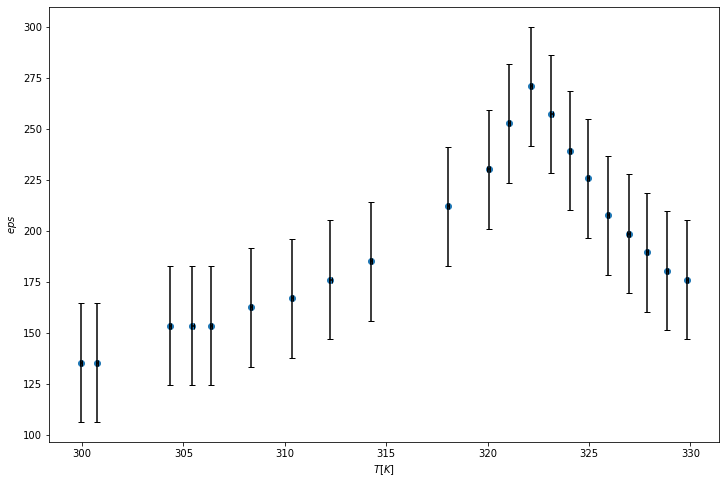

In [150]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df["TK"], df["eps"], label = "eps")

ax.errorbar(df["TK"], df["eps"], xerr = df["uT K"], yerr = df["ueps"], fmt = "none", label = "eps", capsize=3, ecolor="black")

ax.set_xlabel(r"$T[K]$")
ax.set_ylabel(r"$eps$")

fig.savefig("out/eps.jpg", dpi = 1600)
plt.show()

In [153]:
a, b, ua, ub, chi2 = least_squares(df["TK"][12:], df["1/chi"][12:], df["u1/chi"][12:], 12, 20)

print("a = ", a, "ua = ", ua)
print("b = ", b, "ub = ", ub)
print("chi2 = ", chi2)

xTc = -b/a
print("temp Curie from least squares = ", xTc)

a =  0.0002794598257187986 ua =  8.702181278696423e-05
b =  -0.08635189438550205 ub =  0.02824549974999127
chi2 =  0.7962463410385879
temp Curie from least squares =  308.99573548146446


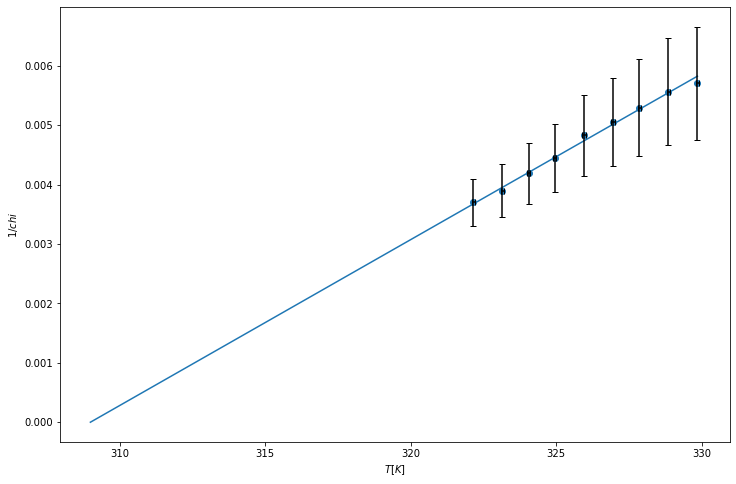

In [154]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df["TK"][12:], df["1/chi"][12:], label = "1/chi")
ax.plot([xTc, df["TK"][20]], [a*xTc+b,a*df["TK"][20]+b], label = "1/chi fit")

ax.errorbar(df["TK"][12:], df["1/chi"][12:], xerr = df["uT K"][12:], yerr = df["u1/chi"][12:], fmt = "none", label = "1/chi", capsize=3, ecolor="black")

ax.set_xlabel(r"$T[K]$")
ax.set_ylabel(r"$1/chi$")

fig.savefig("out/chi-1.jpg", dpi = 1600)
plt.show()